<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Violations_of_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import statsmodels.api as sm
from statsmodels import regression, stats
import statsmodels
import matplotlib.pyplot as plt

In [6]:
residuals = np.random.normal(0, 1, 1000)

_, pvalue, _, _ = statsmodels.stats.stattools.jarque_bera(residuals)
print(pvalue)

residuals = np.random.poisson(size=1000)

_, pvalue, _, _ = statsmodels.stats.stattools.jarque_bera(residuals)
print(pvalue)

0.5144957927380154
1.4113869018949396e-28


## Heteroskedasticity

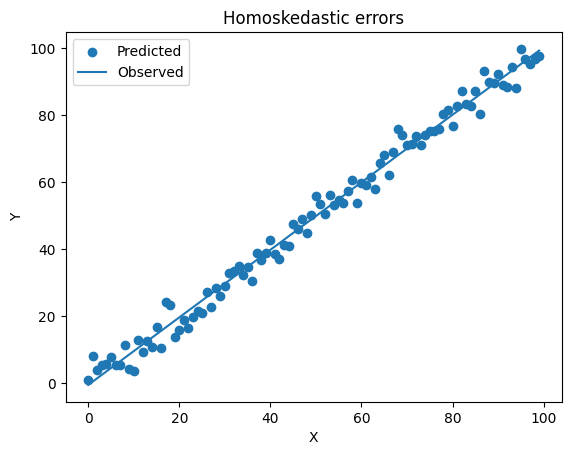

In [7]:
xs = np.arange(100)
y1 = xs + 3 * np.random.randn(100)

slr1 = regression.linear_model.OLS(y1, sm.add_constant(xs)).fit()
fit1 = slr1.params[0] + slr1.params[1] * xs

plt.scatter(xs, y1)
plt.plot(xs, fit1)
plt.title('Homoskedastic errors')
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

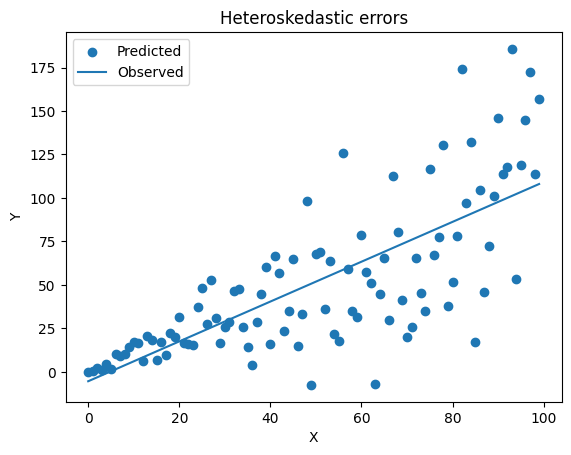

In [8]:
y2 = xs * (1 + 0.5 * np.random.randn(100))

slr2 = regression.linear_model.OLS(y2, sm.add_constant(xs)).fit()
fit2 = slr2.params[0] + slr2.params[1] * xs

plt.scatter(xs, y2)
plt.plot(xs, fit2)
plt.title('Heteroskedastic errors')
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [9]:
slr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.36e-18
Time:                        16:49:45   Log-Likelihood:                -482.10
No. Observations:                 100   AIC:                             968.2
Df Residuals:                      98   BIC:                             973.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3777      6.021     -0.893      0.374     -17.327       6.571
x1             1.1454      0.105     10.901      0.000       0.937       1.354
==============================================================================
Omnibus:                        2.907   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.572
Skew:                           0.165   Prob(JB):                        0.276
Kurtosis:                       3.713   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
residuals1 = y1 - fit1
residuals2 = y2 - fit2
xs_with_constant = sm.add_constant(xs)

_, jb_pvalue1, _, _ = statsmodels.stats.stattools.jarque_bera(residuals1)
_, jb_pvalue2, _, _ = statsmodels.stats.stattools.jarque_bera(residuals2)
print("p-value for residuals1 being normal", jb_pvalue1)
print("p-value for residuals2 being normal", jb_pvalue2)

_, pvalue1, _, _ = statsmodels.stats.diagnostic.het_breuschpagan(residuals1, xs_with_constant)
_, pvalue2, _, _ = statsmodels.stats.diagnostic.het_breuschpagan(residuals2, xs_with_constant)
print("p-value for residuals1 being heteroskedastic", pvalue1)
print("p-value for residuals2 being heteroskedastic", pvalue2)

p-value for residuals1 being normal 0.6013640626533594
p-value for residuals2 being normal 0.2763938016948196
p-value for residuals1 being heteroskedastic 0.24702409174108186
p-value for residuals2 being heteroskedastic 1.9283879650692626e-06


### Correcting for Heteroskedasticity

In [15]:
print(slr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.36e-18
Time:                        17:19:57   Log-Likelihood:                -482.10
No. Observations:                 100   AIC:                             968.2
Df Residuals:                      98   BIC:                             973.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3777      6.021     -0.893      0.3

In [16]:
print(slr2.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     111.0
Date:                Fri, 10 May 2024   Prob (F-statistic):           8.41e-18
Time:                        17:20:27   Log-Likelihood:                -482.10
No. Observations:                 100   AIC:                             968.2
Df Residuals:                      98   BIC:                             973.4
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3777      3.664     -1.468      0.1

## Serial correlation of errors

In [17]:
import yfinance as yf

In [19]:
start = '2014-01-01'
end = '2015-01-01'

y = yf.download('DAL', start=start, end=end)['Close']
x = np.arange(y.shape[0])

model = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

[*********************100%%**********************]  1 of 1 completed


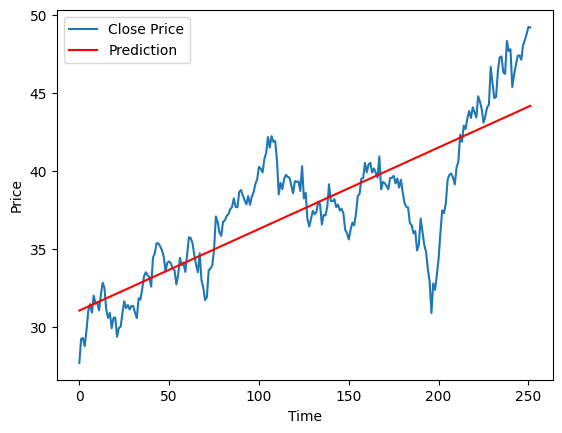

In [20]:
prediction = model.params[0] + model.params[1] * x

plt.plot(x, y, label='Close Price')
plt.plot(x, prediction, color='r', label='Prediction')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     487.0
Date:                Fri, 10 May 2024   Prob (F-statistic):           1.26e-60
Time:                        17:25:47   Log-Likelihood:                -610.07
No. Observations:                 252   AIC:                             1224.
Df Residuals:                     250   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0569      0.343     90.416      0.000      30.380      31.733
x1             0.0523      0.002     22.068      0.000       0.048       0.057
==============================================================================
Omnibus:                       30.274   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.319
Skew:                          -0.746   Prob(JB):                     2.38e-10
Kurtosis:                       4.413   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing for Autocorrelation

In [25]:
_, prices_qstats, prices_qstat_pvalues = statsmodels.tsa.stattools.acf(y, qstat=True)
print('Prices autocorrelation p-values', prices_qstat_pvalues)

_, prices_qstats, prices_qstat_pvalues = statsmodels.tsa.stattools.acf(y - prediction, qstat=True)
print('Prices autocorrelation p-values', prices_qstat_pvalues)

Prices autocorrelation p-values [1.64929373e-053 1.25448335e-100 1.17450418e-144 7.46619358e-186
 2.18259689e-224 2.14475147e-260 4.30138438e-294 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
Prices autocorrelation p-values [9.78709748e-052 7.33740565e-096 1.53208144e-135 1.66522604e-171
 8.98930562e-204 4.34935549e-232 4.78125068e-257 4.86935857e-279
 1.18980348e-298 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]


In [26]:
_, jb_pvalue, _, _ = statsmodels.stats.stattools.jarque_bera(y - prediction)

print('Jarque-Bera p-value that residuals are normally distributed', jb_pvalue)

Jarque-Bera p-value that residuals are normally distributed 2.3781776297181573e-10


### Newey-West

In [29]:
cov_mat = stats.sandwich_covariance.cov_hac(model)

print(f'Old standard errors: {model.bse[0]}, {model.bse[1]}')
print(f'Adjusted standard errors: {np.sqrt(cov_mat[0, 0])}, {np.sqrt(cov_mat[1, 1])}')

Old standard errors: 0.34348849212708715, 0.0023679196604847004
Adjusted standard errors: 0.5073144922350692, 0.005115375612418733


## Multicollinearity

In [32]:
start = '2014-01-01'
end = '2015-01-01'

b1 = yf.download('SPY', start=start, end=end)['Close']
b2 = yf.download('MDY', start=start, end=end)['Close']
a = yf.download('HPQ', start=start, end=end)['Close']

mlr = regression.linear_model.OLS(a, sm.add_constant(np.column_stack((b1,b2)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1] * b1 + mlr.params[2] * b2

print(f'\nR2: {mlr.rsquared_adj}')
print(f'T-Statistics of coefficients:\n {mlr.tvalues}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


R2: 0.8878942049137958
T-Statistics of coefficients:
 const   -11.743405
x1       24.204940
x2       -5.835811
dtype: float64


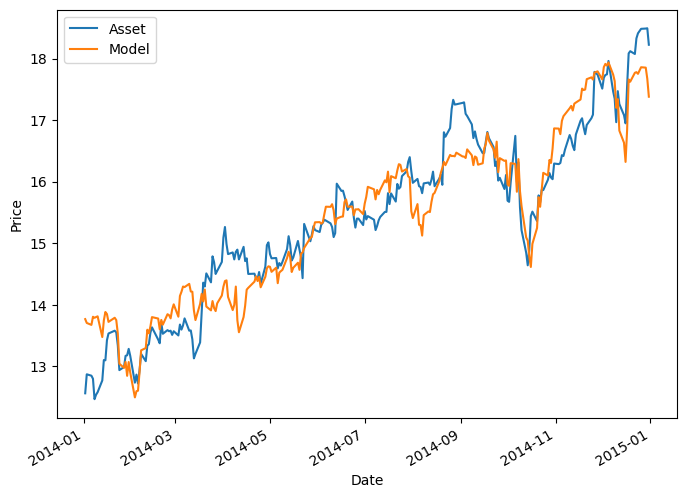

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
a.plot(ax=ax)
mlr_prediction.plot(ax=ax)
plt.legend(['Asset', 'Model'])
plt.ylabel('Price')
plt.show()

In [34]:
mlr = regression.linear_model.OLS(a, sm.add_constant(b1)).fit()
mlr_prediction = mlr.params[0] + mlr.params[1] * b1

print(f'\nR2: {mlr.rsquared_adj}')
print(f'T-Statistics of coefficients:\n {mlr.tvalues}')


R2: 0.8730708204710954
T-Statistics of coefficients:
 const   -21.642805
Close    41.562972
dtype: float64


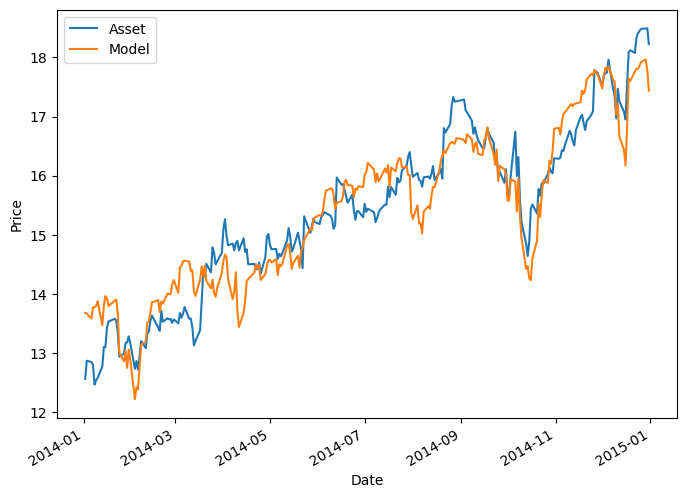

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
a.plot(ax=ax)
mlr_prediction.plot(ax=ax)
plt.legend(['Asset', 'Model'])
plt.ylabel('Price')
plt.show()

## Eample: Anscombe's quartet

In [36]:
from scipy.stats import pearsonr

In [37]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
slr1 = regression.linear_model.OLS(y1, sm.add_constant(x1)).fit()

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
slr2 = regression.linear_model.OLS(y2, sm.add_constant(x2)).fit()

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
slr3 = regression.linear_model.OLS(y3, sm.add_constant(x3)).fit()

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
slr4 = regression.linear_model.OLS(y4, sm.add_constant(x4)).fit()

In [40]:
print(f'Coefficients: {slr1.params}, {slr2.params}, {slr3.params}, {slr4.params}')
print(f'Pearson R: {pearsonr(x1, y1), pearsonr(x2, y2)[0], pearsonr(x3, y3)[0], pearsonr(x4, y4)[0]}')
print(f'R2: {slr1.rsquared, slr2.rsquared, slr3.rsquared, slr4.rsquared}')

Coefficients: [3.00009091 0.50009091], [3.00090909 0.5       ], [3.00245455 0.49972727], [3.00172727 0.49990909]
Pearson R: (PearsonRResult(statistic=0.81642051634484, pvalue=0.002169628873078783), 0.8162365060002427, 0.8162867394895982, 0.8165214368885029)
R2: (0.666542459508775, 0.6662420337274844, 0.6663240410665593, 0.6667072568984652)


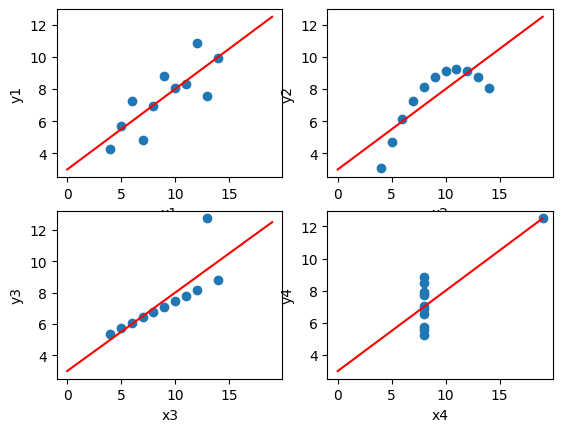

In [42]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
xs = np.arange(20)
ax1.plot(slr1.params[0] + slr1.params[1]*xs, 'r')
ax1.scatter(x1, y1)
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax2.plot(slr2.params[0] + slr2.params[1]*xs, 'r')
ax2.scatter(x2, y2)
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')
ax3.plot(slr3.params[0] + slr3.params[1]*xs, 'r')
ax3.scatter(x3, y3)
ax3.set_xlabel('x3')
ax3.set_ylabel('y3')
ax4.plot(slr4.params[0] + slr4.params[1]*xs, 'r')
ax4.scatter(x4,y4)
ax4.set_xlabel('x4')
ax4.set_ylabel('y4')
plt.show()